In [2]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
from numpy.linalg import norm
from collections import Counter, defaultdict
from scipy.sparse import csr_matrix
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import tensorflow as tf
from __future__ import absolute_import, division, print_function

# Regression

In [3]:
# Reading the preprocessed data
data = pd.read_csv(
    filepath_or_buffer='..\..\Data\example.csv', 
    index_col=0)

int_rate = data.iloc[:,19:20]

data=data.drop(['int_rate'], axis=1)

In [4]:
int_rate = int_rate['int_rate'].str.split('%').str.get(0)

In [5]:
# Converting Categorical to Continuous Values
le = preprocessing.LabelEncoder()
data['amount_diff_inv'] = le.fit_transform(data['amount_diff_inv'])
data['grade'] = le.fit_transform(data['grade'])
data['home_ownership'] = le.fit_transform(data['home_ownership'])
data['verification_status'] = le.fit_transform(data['verification_status'])
data['purpose'] = le.fit_transform(data['purpose'])
data['loan_status'] = le.fit_transform(data['loan_status'])
data['initial_list_status'] = le.fit_transform(data['initial_list_status'])
data['delinq_2yrs_cat'] = le.fit_transform(data['delinq_2yrs_cat'])
data['inq_last_6mths_cat'] = le.fit_transform(data['inq_last_6mths_cat'])
data['pub_rec_cat'] = le.fit_transform(data['pub_rec_cat'])

In [6]:
# #Scaling the data using standardscalar 
# scaler = preprocessing.StandardScaler()
# X_scaled = scaler.fit_transform(data)

In [7]:
#Scaling the data using Min_max scalar
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(data)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, int_rate, test_size=0.20, random_state=21)

In [9]:
# Get number of positve and negative samples
pos = data[data["target"] == 1].shape[0]
neg = data[data["target"] == 0].shape[0]
print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(pos / neg) * 100:.3f}%")

Positive examples = 81861
Negative examples = 310647
Proportion of positive to negative examples = 26.352%


# Linear Regression

In [10]:
lm = linear_model.LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=None)
scores = cross_val_score(lm, X_train, y_train, scoring="neg_mean_absolute_error", cv=20)
scores

array([-1.05218765, -1.04769838, -1.05180144, -1.05275321, -1.06379648,
       -1.06704438, -1.06191418, -1.05475721, -1.0606714 , -1.05524232,
       -1.06795008, -1.04266088, -1.05247111, -1.05682637, -1.06294858,
       -1.04797328, -1.0563036 , -1.04683639, -1.0594542 , -1.05490442])

In [11]:
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
predictions[0:5]

array([10.58821843, 14.23496065,  6.10189236, 27.34068937, 10.23361699])

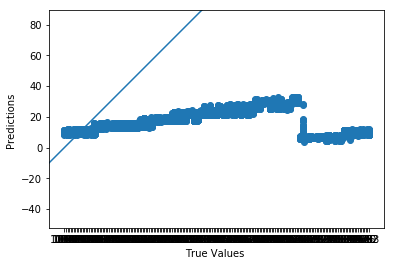

In [12]:
from matplotlib import pyplot as plt
testing_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, testing_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

In [13]:
mae = mean_absolute_error(predictions, y_test)
print("Testing set Mean Abs Error: {:7.2f}%".format(mae))

Testing set Mean Abs Error:    1.05%


In [14]:
mean_absolute_error_array_LR =[]
mean_absolute_error_array_LR.append(mae)

# Randomforest Regression

In [15]:
mean_score = []
number_estimator=[20, 50, 70, 100]

In [16]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 28)
scores = cross_val_score(rf, X_train, y_train, scoring="neg_mean_absolute_error", cv=2)
mean = np.mean(scores, dtype=np.float64)
mean_score.append (mean)
rf_score= rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
predictions[0:5]

C:\Users\Virat\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


array([10.7817, 14.052 ,  5.366 , 28.7854,  9.9282])

In [17]:
print(mean_score)

[-0.2601705069329904]


In [18]:
fig = plt.figure()
plt.rcParams["figure.figsize"]  
plt.plot(number_estimator, mean_score)
plt.xlabel('number of Estimator')
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (4,) and (1,)

In [ ]:
mea = mean_absolute_error(y_test, predictions)
mea

In [ ]:
mse = mean_squared_error(predictions, y_test)
mse

In [ ]:
mean_absolute_error_array_RF =[]
mean_absolute_error_array_RF.append(mse)

In [ ]:
test_predictions = model.predict(X_test).flatten()
plt.rcParams["figure.figsize"] = [32,20]
plt.scatter(y_test, predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

In [ ]:
fig = plt.figure()
plt.rcParams["figure.figsize"]  
plt.plot(mean_absolute_error_array_RF,'b-o', label ="Random-Forest Regressor")
plt.plot(mean_absolute_error_array_LR,'r-o', label ="Linear Regression ")
plt.ylabel('Mean Absolute Error(%)')
plt.legend()
plt.grid(True)
plt.show()